<a href="https://colab.research.google.com/github/bshriselvamkumar/AI-ML-DL-Training/blob/main/Iris_K_Random%2C_DBScan%2C_Hierarchy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
d = files.upload()

Saving Iris.csv to Iris (1).csv


In [ ]:
df = pd.read_csv('Iris.csv')

In [ ]:
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df = df.drop('Id',axis=1)

In [ ]:
df = df.drop('Species', axis = 1)

In [ ]:
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0


In [ ]:
x = df.iloc[:,0:4].values

In [ ]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

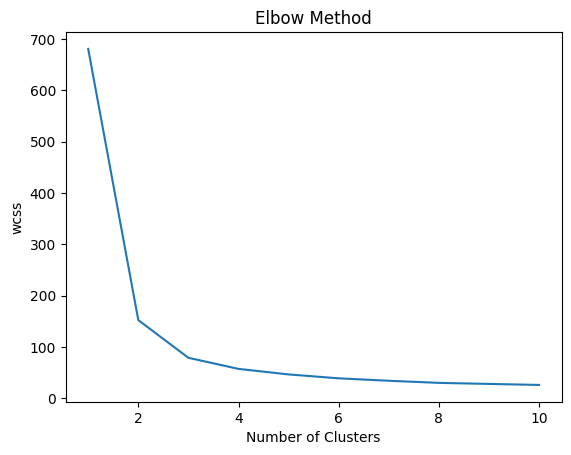

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
model2 = DBSCAN(eps=0.3, min_samples=10)

In [ ]:
model2.fit(x)

DBSCAN(eps=0.3, min_samples=10)

In [ ]:
label = model2.labels_

In [ ]:
label

array([ 0,  0,  0,  0,  0, -1, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1, -1,
        0, -1,  0, -1,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0,  0, -1,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

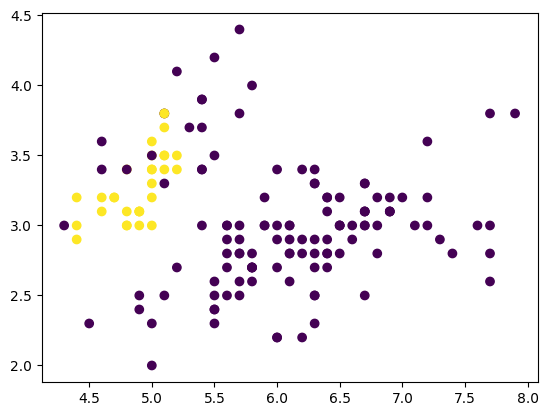

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=label)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model3 = AgglomerativeClustering(n_clusters=5)

In [ ]:
model3.fit(x)

AgglomerativeClustering(n_clusters=5)

In [ ]:
label = model3.labels_

In [ ]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 4, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 4, 2, 3, 4, 4, 3, 1, 3, 4, 3,
       4, 4, 4, 2, 2, 4, 4, 3, 3, 2, 4, 2, 3, 2, 4, 3, 2, 2, 4, 3, 3, 3,
       4, 2, 2, 3, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2])

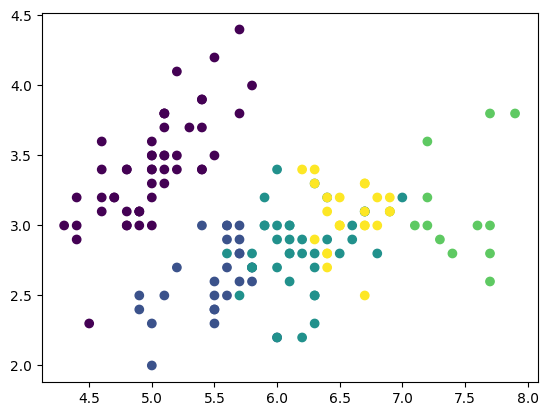

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=label)

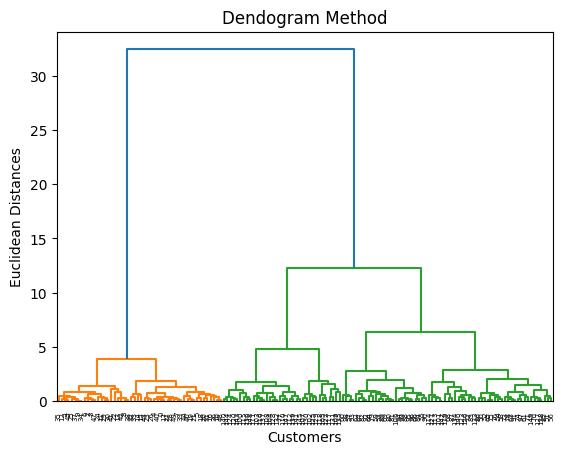

In [ ]:
import scipy.cluster.hierarchy as sch
d_gram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendogram Method')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
#plt.savefig('img_1.png', dpi=500)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:
sh_score = silhouette_score(x, label)

In [ ]:
sh_score

0.4841553526240121

In [ ]:
ch = calinski_harabasz_score(x, label) #distance metrices

In [ ]:
ch

487.07034110928674

In [ ]:
d = davies_bouldin_score(x, label)

In [ ]:
d

0.8206871183525501